In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
import scipy.optimize as opt

In [5]:
# df1 = pd.read_csv("data/Physics 5CL Capstone Data - exp1.csv")
df = pd.read_csv("data/Physics 5CL Capstone Data - exp2.csv")

In [6]:
df

,psi,psi_err,I_60,I_60_err,I_82_5,I_82_5_err,I_22_5,I_22_5_err,I_37_5,I_37_5_err
0,0.0,2.828427,4612,0.094,5217.0,0.160,4422.0,0.210,3115,0.280
1,7.5,2.828427,4512,0.140,5205.0,0.170,4316.0,0.180,3048,0.140
2,15.0,2.828427,4341,0.094,5114.0,0.250,4149.0,0.160,2960,0.100
3,22.5,2.828427,4055,0.077,4923.0,0.200,3795.0,0.250,2802,0.140
4,30.0,2.828427,3805,0.100,4440.0,0.180,3490.0,0.200,2674,0.130
5,37.5,2.828427,3407,0.077,4015.0,0.180,2938.0,0.220,2500,0.094
6,45.0,2.828427,3095,0.094,3391.0,0.140,2559.0,0.140,2326,0.080
7,52.5,2.828427,2736,0.075,2765.0,0.120,1999.0,0.110,2166,0.110
8,60.0,2.828427,2463,0.070,2052.0,0.170,1617.0,0.100,2030,0.086
9,67.5,2.828427,2203,0.068,1405.0,0.130,1170.0,0.082,1914,0.099


In [7]:
def intensity_function(x, m, b, p):
    return m*np.sin(x+p)**2+b

def simple_linear_fit(x, y):
    N = len(x)
    dell = N*np.sum(x**2)-np.sum(x)**2
    m = (N*np.sum(x*y)-np.sum(x)*np.sum(y))/dell
    c = (np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))/dell
    err_cu = np.sqrt(1/(N-2)*np.sum((y-m*x-c)**2))
    err_m = err_cu*np.sqrt(N/dell)
    err_c = err_cu*np.sqrt(np.sum(x**2)/dell)
    return m, err_m, c, err_c

def weighted_linear_fit(x, y, err):
    weights = 1/err**2
    dell = np.sum(weights)*np.sum(weights*x**2)-(np.sum(weights*x))**2
    m = (np.sum(weights)*np.sum(weights*x*y)-np.sum(weights*x)*np.sum(weights*y))/dell
    b=(np.sum(weights*y)-m*np.sum(weights*x))/np.sum(weights)
    err_m = np.sqrt(np.sum(weights)/dell)
    err_b = np.sqrt(np.sum(weights*x**2)/dell)
    return m, err_m, b, err_b

m = -2656.5235685694256 b = 4610.556362104557 p = 0.06882158189163358


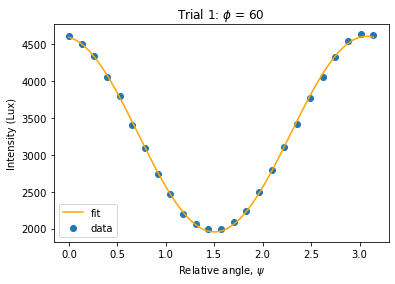

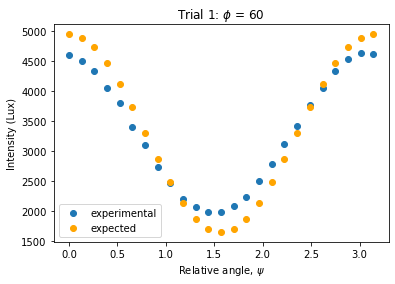

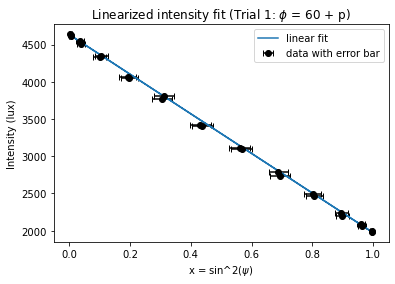

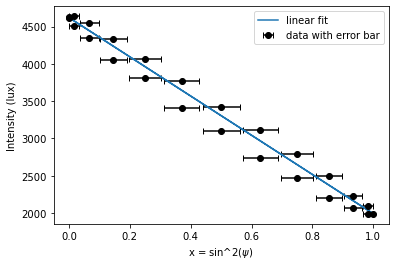

For trial 1, e =  0.7544959259317563  while we expected that e = 0.8164965809277259
For trial 1, total intensity of the light is  6609.999925660537 when we expect it to be 6602.0

For trial 2, e =  0.980399598947247  while we expected that e = 0.9912959295180227
For trial 2, total intensity of the light is  5512.999919981459 when we expect it to be 5423.0

For trial 3, e =  0.9060815200713311  while we expected that e = 0.9101797211244547
For trial 3, total intensity of the light is  5129.899954932258 when we expect it to be 5200.9

For trial 4, e =  0.6374916966717574  while we expected that e = 0.6412560280567634
For trial 4, total intensity of the light is  4958.499853096132 when we expect it to be 4962.0

[0.04654211 0.00666977 0.02632018 0.09385082]


In [25]:
# experiment 2

# define function for the intensity of the light for the curve_fit later

def intensity_function(x, m, b, p):
    return m*np.sin(x+p)**2+b

# import data from spreadsheet. Note, points where the derivative in error propogation is 0, we add a 0.01 so
# the error propogation does not error out

data = open("data/Physics 5CL Capstone Data - exp2.csv", "r")

I_trial_2, I_trial_3, I_trial_4 = np.loadtxt(data, delimiter=",", skiprows=1, usecols=(4, 6, 8), unpack=True)

phi_2 = np.array([60, 82.5, 67.5, 52.5])*np.pi/180
psi_2 = np.array([0.01, 7.5, 15, 22.5, 30, 37.5, 45, 52.5, 60, 67.5, 75, 82.5, 90.01, 97.5, 105, 112.5, 120, 127.5, 
                  135, 142.5, 150, 157.5, 165, 172.5, 180.01])*np.pi/180

# compute the expected eccentricities and their uncertainties and convert to arrays

e_2 = []
e_2_err = []
for i in range(len(list(phi_2))):
    if abs(phi_2[i]) <= 45*np.pi/180:
        e_2.append(np.sqrt(1-np.tan(phi_2[i])**2))
        e_2_err.append((np.tan(phi_2[i])*1/np.cos(phi_2[i])**2)/np.sqrt(1-np.tan(phi_2[i])**2)*2*np.sqrt(2)*np.pi/180)
    else:
        e_2.append(np.sqrt(1-1/np.tan(phi_2[i])**2))
        e_2_err.append((1/np.tan(phi_2[i])*1/np.sin(phi_2[i])**2)/np.sqrt(1-1/np.tan(phi_2[i])**2)*2*np.sqrt(2)*np.pi/180)
        
e_2 = np.array(e_2)
e_2_err = np.array(e_2_err)

# also importing data from csv since my code is not well organized

I_trial_1 = np.array([4612, 4512, 4341, 4055, 3805, 3407, 3095, 2736, 2463, 2203, 2063, 1987, 1990, 2087, 2233, 2493, 2789, 
                      3112, 3417, 3775, 4058, 4332, 4542, 4638, 4628])  

# compute the total intensity of the light

I_0_2 = np.array([I_trial_1[0], I_trial_2[0], I_trial_3[0], I_trial_4[0]])
I_90_2 = np.array([I_trial_1[12], I_trial_2[12], I_trial_3[12], I_trial_4[12]])
I_2 = I_0_2 + I_90_2

# compute the expected intensity to compare

I_expected_trial_1 = I_2[0]/(2-e_2[0]**2)*(1-e_2[0]**2*np.sin(psi_2)**2)
I_expected_trial_2 = I_2[1]/(2-e_2[1]**2)*(1-e_2[1]**2*np.sin(psi_2)**2)
I_expected_trial_3 = I_2[2]/(2-e_2[2]**2)*(1-e_2[2]**2*np.sin(psi_2)**2)
I_expected_trial_4 = I_2[3]/(2-e_2[3]**2)*(1-e_2[3]**2*np.sin(psi_2)**2)

# perform curve_fit fit to the first data set to determine a phase angle

par, cov = opt.curve_fit(intensity_function, psi_2, I_trial_1, p0 = [-2630, 4620, np.pi/60])
m, b, p = par
print("m =", m, "b =", b, "p =", p)
# display curve_fit fit vs data

plt.scatter(psi_2, I_trial_1, label = "data")
plt.plot(np.linspace(0, np.pi, 500), m*np.sin(np.linspace(0, np.pi, 500)+p)**2+b, color = "orange", label = "fit")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 1: $\phi$ = 60")
plt.show()

# graphs of data vs expected values.

plt.scatter(psi_2, I_trial_1, label = "experimental")
plt.scatter(psi_2, I_expected_trial_1, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 1: $\phi$ = 60")
plt.show()

"""plt.scatter(psi_2, I_trial_2, label = "experimental")
plt.scatter(psi_2, I_expected_trial_2, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 2: $\phi$ = 82.5")
plt.show()

plt.scatter(psi_2, I_trial_3, label = "experimental")
plt.scatter(psi_2, I_expected_trial_3, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 3: $\phi$ = 22.5")
plt.show()

plt.scatter(psi_2, I_trial_4, label = "experimental")
plt.scatter(psi_2, I_expected_trial_4, color = "orange", label = "expected")
plt.legend()
plt.xlabel("Relative angle, $\psi$")
plt.ylabel("Intensity (Lux)")
plt.title("Trial 4: $\phi$ = 37.5")
plt.show()"""

# import error in psi

err_psi_2 = np.array([2*np.sqrt(3)*np.pi/180]*25)

# determine x = sin^2(psi) and its error

x = np.sin(psi_2)**2
err_x = 2*np.sin(psi_2)*np.cos(psi_2)*err_psi_2

# separately determine x for the first fit adjusting for the phase angle and its error

x_adjust_1 = np.sin(psi_2+p)**2
err_x_adjust_1 = 2*np.sin(psi_2+p)*np.cos(psi_2+p)*err_psi_2/np.sqrt(3)

"""plt.errorbar(x, I_trial_1, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()
plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.show()"""

# determine the initial parameters from the unweighted linear fit

initial_parameters_adjust_1 = np.array(simple_linear_fit(x_adjust_1, I_trial_1))

initial_parameters_1 = np.array(simple_linear_fit(x, I_trial_1))
initial_parameters_2 = np.array(simple_linear_fit(x, I_trial_2))
initial_parameters_3 = np.array(simple_linear_fit(x, I_trial_3))
initial_parameters_4 = np.array(simple_linear_fit(x, I_trial_4))

# determine the equivalent errors and adjust

err_equiv_adjust_1 = abs(initial_parameters_adjust_1[0])*err_x_adjust_1

err_equiv_1 = abs(initial_parameters_1[0])*err_x
err_equiv_2 = abs(initial_parameters_2[0])*err_x
err_equiv_3 = abs(initial_parameters_3[0])*err_x
err_equiv_4 = abs(initial_parameters_4[0])*err_x

# determine the final parameters from the weighted linear fit

final_parameters_adjust_1 = np.array(weighted_linear_fit(x_adjust_1, I_trial_1, err_equiv_adjust_1))

final_parameters_1 = np.array(weighted_linear_fit(x, I_trial_1, err_equiv_1))
final_parameters_2 = np.array(weighted_linear_fit(x, I_trial_2, err_equiv_2))
final_parameters_3 = np.array(weighted_linear_fit(x, I_trial_3, err_equiv_3))
final_parameters_4 = np.array(weighted_linear_fit(x, I_trial_4, err_equiv_4))

# graphs of final weighted linear fits

# plt.errorbar(x_adjust_1, I_trial_1, yerr = err_x_adjust_1*final_parameters_adjust_1[0]*x_adjust_1+final_parameters_adjust_1[2]/100, fmt='ko', capsize = 3, capthick = 1, label="data with error bars")    # use percent x err as percent y err
plt.errorbar(x_adjust_1, I_trial_1, xerr = err_x_adjust_1, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x_adjust_1, final_parameters_adjust_1[0]*x_adjust_1+final_parameters_adjust_1[2], label = "linear fit")
plt.xlabel("x = sin^2($\psi$)")
plt.ylabel("Intensity (lux)")
plt.title("Linearized intensity fit (Trial 1: $\phi$ = 60 + p)")
plt.legend()
plt.show()

plt.errorbar(x, I_trial_1, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_1[0]*x+final_parameters_1[2], label = "linear fit")
plt.xlabel("x = sin^2($\psi$)")
plt.ylabel("Intensity (lux)")
plt.legend()
plt.show()

"""plt.errorbar(x, I_trial_2, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_2[0]*x+final_parameters_2[2], label = "linear fit")
plt.show()

plt.errorbar(x, I_trial_3, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_3[0]*x+final_parameters_3[2], label = "linear fit")
plt.show()

plt.errorbar(x, I_trial_4, xerr = err_x, fmt='ko', capsize = 3, capthick = 1, label="data with error bar")
plt.plot(x, final_parameters_4[0]*x+final_parameters_4[2], label = "linear fit")
plt.show()"""

# determine the eccentricity, e from the fit parameters (without error for now)

e_exp_trial_1 = np.sqrt(-final_parameters_1[0]/final_parameters_1[2])
e_exp_trial_2 = np.sqrt(-final_parameters_2[0]/final_parameters_2[2])
e_exp_trial_3 = np.sqrt(-final_parameters_3[0]/final_parameters_3[2])
e_exp_trial_4 = np.sqrt(-final_parameters_4[0]/final_parameters_4[2])

# determine the total intensity, I from the fit parameters (without error for now)

total_I_trial_1 = final_parameters_1[2]*(2-e_exp_trial_1**2)
total_I_trial_2 = final_parameters_2[2]*(2-e_exp_trial_2**2)
total_I_trial_3 = final_parameters_3[2]*(2-e_exp_trial_3**2)
total_I_trial_4 = final_parameters_4[2]*(2-e_exp_trial_4**2)

# print e and I (both experimental and expected) for sake of comparison

print("For trial 1, e = ", e_exp_trial_1, " while we expected that e =", e_2[0])
print("For trial 1, total intensity of the light is ", total_I_trial_1, "when we expect it to be", I_2[0])
print("")

print("For trial 2, e = ", e_exp_trial_2, " while we expected that e =", e_2[1])
print("For trial 2, total intensity of the light is ", total_I_trial_2, "when we expect it to be", I_2[1])
print("")

print("For trial 3, e = ", e_exp_trial_3, " while we expected that e =", e_2[2])
print("For trial 3, total intensity of the light is ", total_I_trial_3, "when we expect it to be", I_2[2])
print("")

print("For trial 4, e = ", e_exp_trial_4, " while we expected that e =", e_2[3])
print("For trial 4, total intensity of the light is ", total_I_trial_4, "when we expect it to be", I_2[3])
print("")

# print the uncertainty in expected eccentricity.

print(e_2_err)